<a href="https://colab.research.google.com/github/NanzibaBasnin/Regenerative_Fish_Firming/blob/main/Inferential_Stat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving flux_cdf_stats_products_low1p_lowcost_seaweed_01_24_23.xlsx to flux_cdf_stats_products_low1p_lowcost_seaweed_01_24_23 (1).xlsx
Saving flux_cdf_stats_products_low1p_lowcost_seaweed_07_21_22.xlsx to flux_cdf_stats_products_low1p_lowcost_seaweed_07_21_22 (1).xlsx


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ambient_cdf_stats_products_low1p_lowcost_seaweed_01_24_23.xlsx to ambient_cdf_stats_products_low1p_lowcost_seaweed_01_24_23 (1).xlsx
Saving ambient_cdf_stats_products_low1p_lowcost_seaweed_05_16_22.xlsx to ambient_cdf_stats_products_low1p_lowcost_seaweed_05_16_22 (1).xlsx


In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Read the Excel files
ambient_df1 = pd.read_excel("ambient_cdf_stats_products_low1p_lowcost_seaweed_01_24_23.xlsx")
ambient_df2 = pd.read_excel("ambient_cdf_stats_products_low1p_lowcost_seaweed_05_16_22.xlsx")
#flux_df1 = pd.read_excel("flux_cdf_stats_products_low1p_lowcost_seaweed_01_24_23.xlsx")
#flux_df2 = pd.read_excel("flux_cdf_stats_products_low1p_lowcost_seaweed_07_21_22.xlsx")

# Combine the datasets
ambient_combined = pd.concat([ambient_df1, ambient_df2])
#flux_combined = pd.concat([flux_df1, flux_df2])

# Save the combined datasets as CSV files
ambient_combined.to_csv("ambient_combined.csv", index=False)
#flux_combined.to_csv("flux_combined.csv", index=False)


# RQ1: Is the average cost per tonne of carbon dioxide significantly different in seaweed grown with ambient nutrients than flux nutrients?


H0: The average cost per tonne of carbon dioxide is the same in seaweed grown with ambient nutrients or flux nutrients.

H1:The average cost per tonne of carbon dioxide is different in seaweeds grown with ambient nutrients than those grown with flux nutrients.

Variance Ratio: 0.2346
P-value: 0.0000
T-value: -42.5593
Reject the null hypothesis (H0).


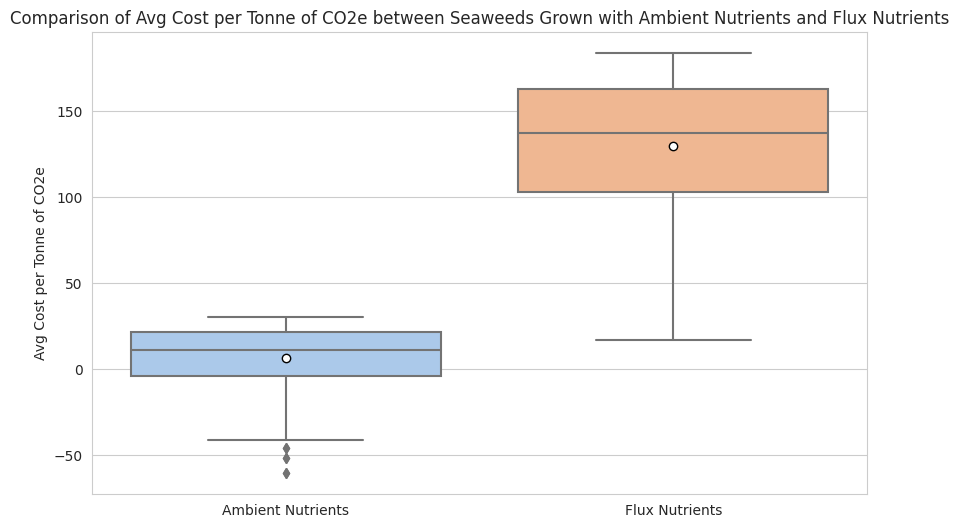

In [ ]:
#one-sample Independent T-test

# Extract the 'avg_cost_per_tonne_CO2e' column
ambient_avg_cost = ambient_combined['avg_cost_per_tonne_CO2e']
flux_avg_cost = flux_combined['avg_cost_per_tonne_CO2e']

# Perform the independent two-sample t-test
t_stat, p_value = stats.ttest_ind(ambient_avg_cost, flux_avg_cost, equal_var=False)

# Calculate the variance ratio
variance_ratio = np.var(ambient_avg_cost) / np.var(flux_avg_cost)

print(f"Variance Ratio: {variance_ratio:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"T-value: {t_stat:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis (H0).")
else:
    print("Fail to reject the null hypothesis (H0).")
# Combine the data for the boxplot
boxplot_data = [ambient_avg_cost, flux_avg_cost]
labels = ['Ambient Nutrients', 'Flux Nutrients']

# Customize the boxplot appearance
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=boxplot_data, palette="pastel", linewidth=1.5, showmeans=True, meanprops=dict(marker='o', markeredgecolor='black', markerfacecolor='white'))
plt.ylabel("Avg Cost per Tonne of CO2e")
plt.xticks(np.arange(len(labels)), labels)
plt.title("Comparison of Avg Cost per Tonne of CO2e between Seaweeds Grown with Ambient Nutrients and Flux Nutrients")
plt.show()



RQ2: Does the average growth in terms of seaweed area significantly differ in seaweeds grown with ambient nutrients than that of flux nutrients?

H0: The average growth of seaweed is same in both ambient nutrients and flux nutrients
H1: The average growth of seaweed is different in ambient nutrients than that in flux nutrients.



Variance Ratio: 0.9791
P-value: 0.8072
T-value: -0.2442
Fail to reject the null hypothesis (H0).


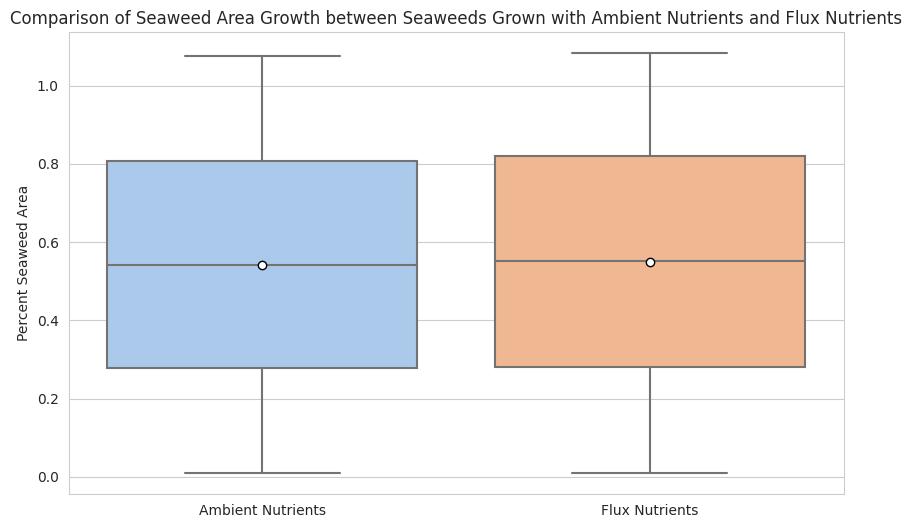

In [ ]:
#independent 2 sample t-test

# Extract the 'percent_seaweed_area' column
ambient_seaweed_area = ambient_combined['percent_seaweed_area']
flux_seaweed_area = flux_combined['percent_seaweed_area']

# Perform the independent two-sample t-test
t_stat2, p_value2 = stats.ttest_ind(ambient_seaweed_area, flux_seaweed_area, equal_var=False)

# Calculate the variance ratio
variance_ratio2 = np.var(ambient_seaweed_area) / np.var(flux_seaweed_area)
print(f"Variance Ratio: {variance_ratio2:.4f}")
print(f"P-value: {p_value2:.4f}")
print(f"T-value: {t_stat2:.4f}")

if p_value2 < alpha:
    print("Reject the null hypothesis (H0).")
else:
    print("Fail to reject the null hypothesis (H0).")
# Combine the data for the boxplot
boxplot_data2 = [ambient_seaweed_area, flux_seaweed_area]
labels2 = ['Ambient Nutrients', 'Flux Nutrients']

# Customize the boxplot appearance
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=boxplot_data2, palette="pastel", linewidth=1.5, showmeans=True, meanprops=dict(marker='o', markeredgecolor='black', markerfacecolor='white'))
plt.ylabel("Percent Seaweed Area")
plt.xticks(np.arange(len(labels2)), labels2)
plt.title("Comparison of Seaweed Area Growth between Seaweeds Grown with Ambient Nutrients and Flux Nutrients")
plt.show()


RQ3 Is there a significant difference between the cumulative CO2 removed and the cumulative carbon removed within seaweed samples?
Hypotheses:
H0 (null hypothesis): There is no significant difference between the cumulative CO2 removed and the cumulative carbon removed within seaweed samples.
H1 (alternative hypothesis): There is a significant difference between the cumulative CO2 removed and the cumulative Carbon removed within seaweed samples.

T-value: 30.3284
P-value: 0.0000
Mean Difference: 11.4543
95% Confidence Interval: (10.710382481650942, 12.198128029111125)
Variance: 35.3742
Reject the null hypothesis (H0).
Variance Ratio: 13.4689


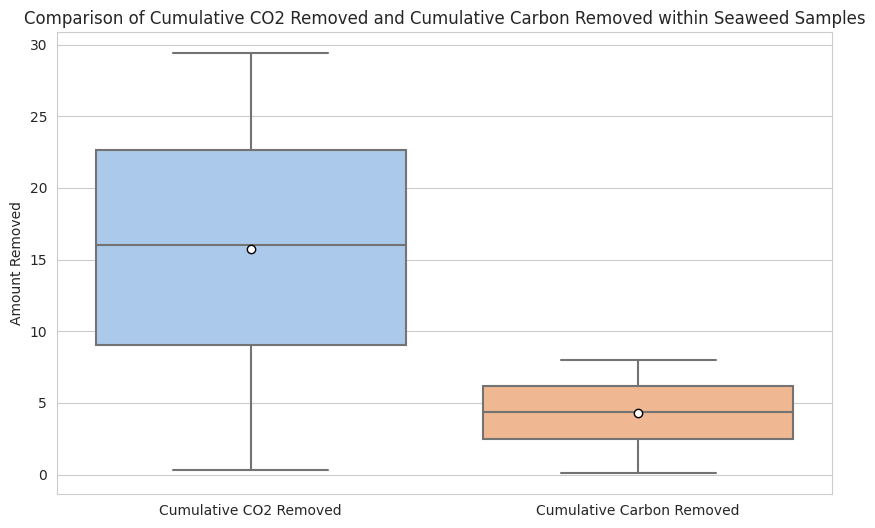

In [ ]:
#paired t-test

# Extract the columns
ambient_cumulative_CO2_removed = ambient_combined['cumulative_CO2_removed']
ambient_cumulative_C_removed = ambient_combined['cumulative_C_removed']

# Perform the paired t-test
t_stat3, p_value3 = stats.ttest_rel(ambient_cumulative_CO2_removed, ambient_cumulative_C_removed)

# Calculate the mean difference
mean_difference = np.mean(ambient_cumulative_CO2_removed - ambient_cumulative_C_removed)

# Calculate the 95% confidence interval
conf_interval = stats.t.interval(0.95, len(ambient_cumulative_CO2_removed) - 1, loc=mean_difference, scale=stats.sem(ambient_cumulative_CO2_removed - ambient_cumulative_C_removed))

# Calculate the variance
variance = np.var(ambient_cumulative_CO2_removed - ambient_cumulative_C_removed, ddof=1)
print(f"T-value: {t_stat3:.4f}")
print(f"P-value: {p_value3:.4f}")
print(f"Mean Difference: {mean_difference:.4f}")
print(f"95% Confidence Interval: {conf_interval}")
print(f"Variance: {variance:.4f}")

if p_value3 < alpha:
    print("Reject the null hypothesis (H0).")
else:
    print("Fail to reject the null hypothesis (H0).")

# Calculate the variance for each variable
variance_CO2 = np.var(ambient_cumulative_CO2_removed, ddof=1)
variance_C = np.var(ambient_cumulative_C_removed, ddof=1)

# Calculate the variance ratio
variance_ratio3 = variance_CO2 / variance_C

# Print the variance ratio
print(f"Variance Ratio: {variance_ratio3:.4f}")

# Combine the data for the boxplot
boxplot_data3 = [ambient_cumulative_CO2_removed, ambient_cumulative_C_removed]
labels3 = ['Cumulative CO2 Removed', 'Cumulative Carbon Removed']

# Customize the boxplot appearance
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=boxplot_data3, palette="pastel", linewidth=1.5, showmeans=True, meanprops=dict(marker='o', markeredgecolor='black', markerfacecolor='white'))
plt.ylabel("Amount Removed")
plt.xticks(np.arange(len(labels3)), labels3)
plt.title("Comparison of Cumulative CO2 Removed and Cumulative Carbon Removed within Seaweed Samples")
plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ambient_cdf_stats_products_low1p_lowcost_seaweed_01_24_23.xlsx to ambient_cdf_stats_products_low1p_lowcost_seaweed_01_24_23 (1).xlsx
Saving ambient_cdf_stats_products_low1p_lowcost_seaweed_05_16_22.xlsx to ambient_cdf_stats_products_low1p_lowcost_seaweed_05_16_22.xlsx


In [ ]:
# Read the Excel files
dataset = pd.read_excel("ambient_data_05_16_22_metadata.xlsx")

# Save the combined datasets as CSV files
dataset.to_csv("ambient.csv", index=False)

In [ ]:
import pandas as pd

# Load your dataset
dataset_file = 'ambient.csv'
df = pd.read_csv(dataset_file)

# Print the column names
print(df.columns)


Index(['Run #', 'capex', 'linecost', 'labor', 'harvcost', 'transportcost',
       'transportems', 'maintenanceboatems', 'insur', 'license', 'opex',
       'sinkval', 'sequestration_rate', 'removal_rate', 'productval',
       'avoidedems_product', 'convertcost', 'convertems', 'depth_mult',
       'wave_mult', 'seaweed_map', 'prod_cost_low1p_avg',
       'percentile_0.2_prodcost_avg', 'percentile_0.4_prodcost_avg',
       'percentile_0.6_prodcost_avg', 'percentile_0.8_prodcost_avg',
       'percentile_1_prodcost_avg', 'prod_cost_avg_northatlantic',
       'prod_cost_avg_southatlantic', 'prod_cost_avg_northpacific',
       'prod_cost_avg_centralpacific', 'prod_cost_avg_southpacific',
       'prod_cost_avg_indian', 'net_costperton_sink_low1p_avg',
       'percentile_0.2_sinkcost_avg', 'percentile_0.4_sinkcost_avg',
       'percentile_0.6_sinkcost_avg', 'percentile_0.8_sinkcost_avg',
       'percentile_1_sinkcost_avg', 'net_costperton_sink_avg_northatlantic',
       'net_costperton_sink_avg

RQ 4: Does seaweed production cost vary significantly across ocean regions (North Atlantic, South Atlantic, North Pacific, Central Pacific, South Pacific, and Indian Ocean)?
Hypotheses:
H0 (null hypothesis): The average cost of producing seaweed across the oceans is not significantly different from one region to the next.
H1 (alternative hypothesis): The average cost of producing seaweed across the oceans is significantly different from one region to the next.


                       sum_sq       df           F  PR(>F)
C(Ocean_Region)  3.625678e+09      5.0  1030.06146     0.0
Residual         2.111497e+10  29994.0         NaN     NaN


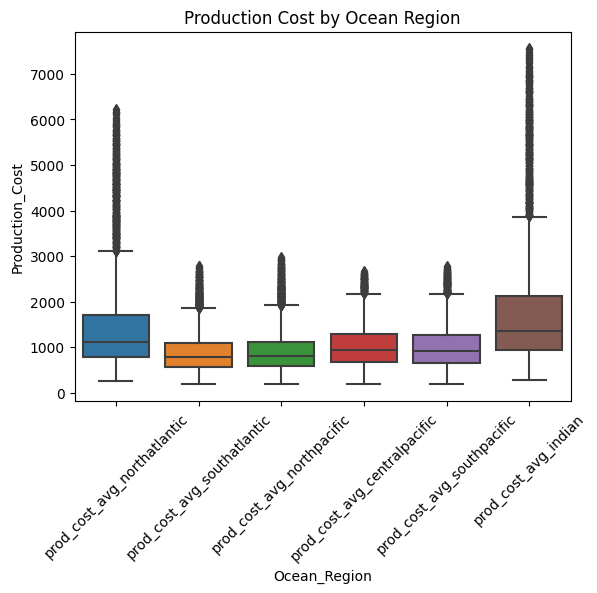

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load your dataset
dataset_file = 'ambient.csv'
df = pd.read_csv(dataset_file)

# Define the ocean regions
ocean_regions = [
    'prod_cost_avg_northatlantic',
    'prod_cost_avg_southatlantic',
    'prod_cost_avg_northpacific',
    'prod_cost_avg_centralpacific',
    'prod_cost_avg_southpacific',
    'prod_cost_avg_indian'
]

# Reshape the dataset to have a long format
df_melted = pd.melt(df, value_vars=ocean_regions, var_name='Ocean_Region', value_name='Production_Cost')

# Perform the one-way ANOVA test
model = ols('Production_Cost ~ C(Ocean_Region)', data=df_melted).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA results
print(anova_table)

# Visualize the results using box plots
sns.boxplot(x='Ocean_Region', y='Production_Cost', data=df_melted)
plt.xticks(rotation=45)
plt.title("Production Cost by Ocean Region")
plt.show()


RQ 5: Does the cost of carbon sequestration in seaweed vary significantly across ocean regions (North Atlantic, South Atlantic, North Pacific, Central Pacific, South Pacific, and Indian Ocean)?
Hypotheses:
H0 (null hypothesis): The average cost of carbon sequestration in seaweed across the oceans is not significantly different from one region to the next.
H1 (alternative hypothesis): The average cost of carbon sequestration in seaweed across the oceans is significantly different from one region to the next.


                       sum_sq       df            F  PR(>F)
C(Ocean_Region)  1.308553e+10      4.0  1136.541806     0.0
Residual         7.194474e+10  24995.0          NaN     NaN


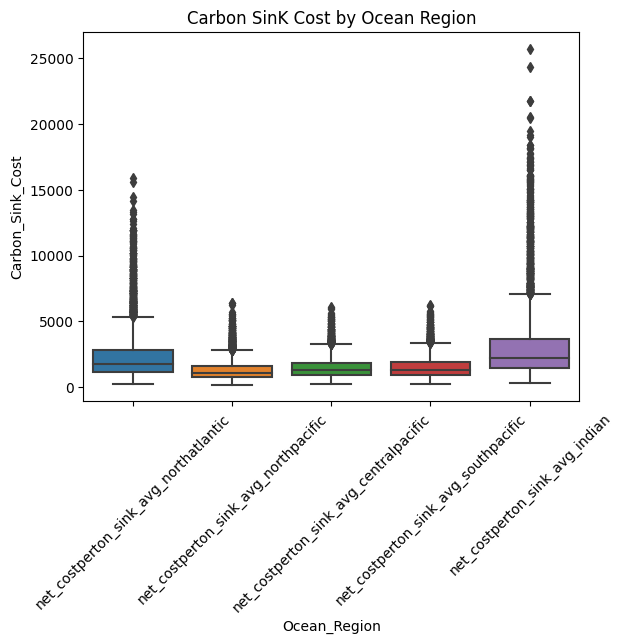

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load your dataset
dataset_file = 'ambient.csv'
df = pd.read_csv(dataset_file)

# Define the ocean regions
ocean_regions = [
   'net_costperton_sink_avg_northatlantic',
'net_costperton_sink_avg_northpacific',
'net_costperton_sink_avg_centralpacific',
'net_costperton_sink_avg_southpacific',
'net_costperton_sink_avg_indian'

]

# Reshape the dataset to have a long format
df_melted = pd.melt(df, value_vars=ocean_regions, var_name='Ocean_Region', value_name='Carbon_Sink_Cost')

# Perform the one-way ANOVA test
model = ols('Carbon_Sink_Cost ~ C(Ocean_Region)', data=df_melted).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA results
print(anova_table)

# Visualize the results using box plots
sns.boxplot(x='Ocean_Region', y='Carbon_Sink_Cost', data=df_melted)
plt.xticks(rotation=45)
plt.title("Carbon SinK Cost by Ocean Region")
plt.show()


In [ ]:
!pip install statsmodels matplotlib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ambient_cdf_stats_products_low1p_lowcost_seaweed_01_24_23.xlsx to ambient_cdf_stats_products_low1p_lowcost_seaweed_01_24_23.xlsx


RQ6: Is there a relationship between the area of seaweed farmed and the cumulative amount of CO2 removed from the atmosphere?


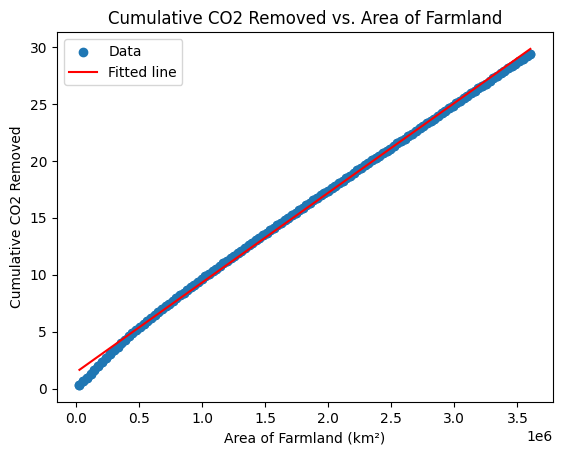

Intercept: 1.4223727840760896
Slope: 7.883966015740222e-06
R-squared: 0.9981245604186963
Adjusted R-squared: 0.998116936680561
F-statistic: 130923.24824045932
F-statistic p-value: 0.0
Intercept p-value: 1.4310841459475455e-87
Slope p-value: 0.0
Intercept standard error: 0.04554290703568906
Slope standard error: 2.1788952779847477e-08
Intercept confidence interval: 0    1.332669
1    1.512077
Name: const, dtype: float64
Slope confidence interval: 0    0.000008
1    0.000008
Name: area_farmed_km2, dtype: float64


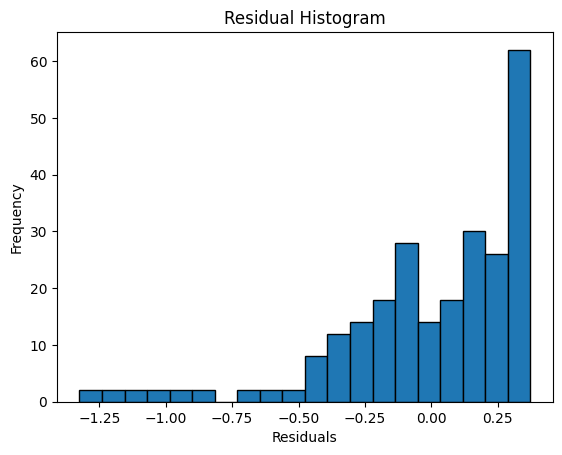

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load your dataset
dataset_file = 'ambient_combined.csv'
data = pd.read_csv(dataset_file)
# Define the independent and dependent variables
X = data['area_farmed_km2']
y = data['cumulative_CO2_removed']

# Add a constant to the independent variable for the regression model
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Create the scatter plot
plt.scatter(data['area_farmed_km2'], data['cumulative_CO2_removed'], label='Data')

# Plot the fitted line
plt.plot(data['area_farmed_km2'], model.predict(X), color='red', label='Fitted line')

# Set the plot labels and title
plt.xlabel('Area of Farmland (km²)')
plt.ylabel('Cumulative CO2 Removed')
plt.title('Cumulative CO2 Removed vs. Area of Farmland')

# Add the legend
plt.legend()

# Show the plot
plt.show()
# Print the coefficients (slope and intercept)
print(f"Intercept: {model.params[0]}")
print(f"Slope: {model.params[1]}")

# Print R-squared and adjusted R-squared
print(f"R-squared: {model.rsquared}")
print(f"Adjusted R-squared: {model.rsquared_adj}")

# Print F-statistic and its associated p-value
print(f"F-statistic: {model.fvalue}")
print(f"F-statistic p-value: {model.f_pvalue}")

# Print p-values for each coefficient
print(f"Intercept p-value: {model.pvalues[0]}")
print(f"Slope p-value: {model.pvalues[1]}")

# Print standard errors for each coefficient
print(f"Intercept standard error: {model.bse[0]}")
print(f"Slope standard error: {model.bse[1]}")

# Print confidence intervals for each coefficient
conf_int = model.conf_int(alpha=0.05)
print(f"Intercept confidence interval: {conf_int.iloc[0]}")
print(f"Slope confidence interval: {conf_int.iloc[1]}")

# Residual analysis
residuals = model.resid
plt.hist(residuals, bins=20, edgecolor="k")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Histogram")
plt.show()


In [ ]:
import pandas as pd

# Create an empty DataFrame
regression_summary = pd.DataFrame(columns=['Coefficient', 'Estimate', 'Standard Error', 'p-value', '95% Confidence Interval'])

# Populate the DataFrame with the regression results
regression_summary.loc['Intercept'] = ['Intercept', 1.4223727840760896, 0.04554290703568906, 1.4310841459475455e-87, (1.332669, 1.512077)]
regression_summary.loc['Slope'] = ['Slope', 7.883966015740222e-06, 2.1788952779847477e-08, 0.0, (0.000008, 0.000008)]

# Display the table
print(regression_summary)


          Coefficient  Estimate  Standard Error       p-value  \
Intercept   Intercept  1.422373    4.554291e-02  1.431084e-87   
Slope           Slope  0.000008    2.178895e-08  0.000000e+00   

          95% Confidence Interval  
Intercept    (1.332669, 1.512077)  
Slope              (8e-06, 8e-06)  


RQ7: Is there a relationship between the cumulative amount of carbon removed from the atmosphere that the area of the farmland of seaweed?




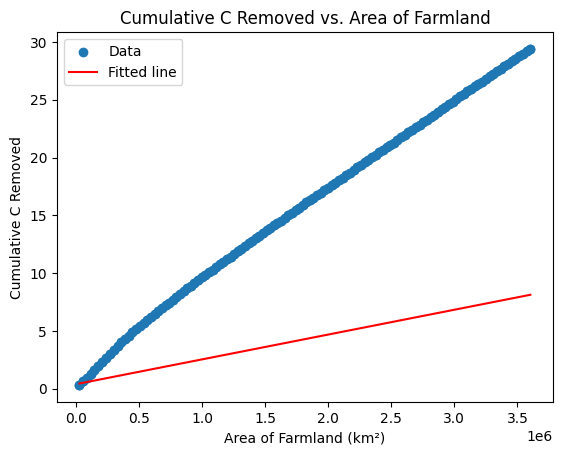

Intercept: 0.387567516097027
Slope: 2.148219622817499e-06
R-squared: 0.9981245604186963
Adjusted R-squared: 0.998116936680561
F-statistic: 130923.24824045926
F-statistic p-value: 0.0
Intercept p-value: 1.4310841459477083e-87
Slope p-value: 0.0
Intercept standard error: 0.012409511453866234
Slope standard error: 5.937044354181876e-09
Intercept confidence interval: 0    0.363125
1    0.412010
Name: const, dtype: float64
Slope confidence interval: 0    0.000002
1    0.000002
Name: area_farmed_km2, dtype: float64


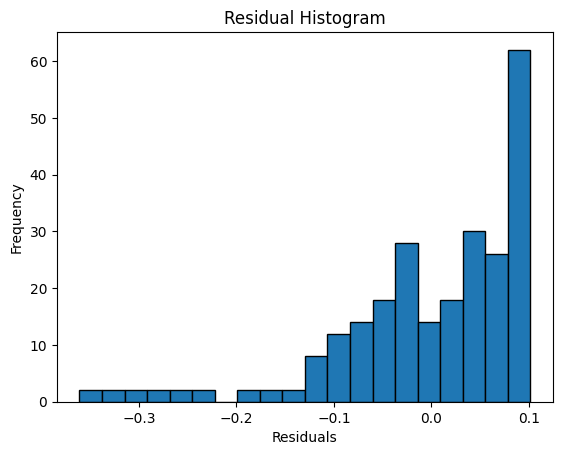

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load your dataset
dataset_file = 'ambient_combined.csv'
data = pd.read_csv(dataset_file)
# Define the independent and dependent variables
X = data['area_farmed_km2']
y = data['cumulative_C_removed']

# Add a constant to the independent variable for the regression model
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Create the scatter plot
plt.scatter(data['area_farmed_km2'], data['cumulative_CO2_removed'], label='Data')

# Plot the fitted line
plt.plot(data['area_farmed_km2'], model.predict(X), color='red', label='Fitted line')

# Set the plot labels and title
plt.xlabel('Area of Farmland (km²)')
plt.ylabel('Cumulative C Removed')
plt.title('Cumulative C Removed vs. Area of Farmland')

# Add the legend
plt.legend()

# Show the plot
plt.show()
# Print the coefficients (slope and intercept)
print(f"Intercept: {model.params[0]}")
print(f"Slope: {model.params[1]}")

# Print R-squared and adjusted R-squared
print(f"R-squared: {model.rsquared}")
print(f"Adjusted R-squared: {model.rsquared_adj}")

# Print F-statistic and its associated p-value
print(f"F-statistic: {model.fvalue}")
print(f"F-statistic p-value: {model.f_pvalue}")

# Print p-values for each coefficient
print(f"Intercept p-value: {model.pvalues[0]}")
print(f"Slope p-value: {model.pvalues[1]}")

# Print standard errors for each coefficient
print(f"Intercept standard error: {model.bse[0]}")
print(f"Slope standard error: {model.bse[1]}")

# Print confidence intervals for each coefficient
conf_int = model.conf_int(alpha=0.05)
print(f"Intercept confidence interval: {conf_int.iloc[0]}")
print(f"Slope confidence interval: {conf_int.iloc[1]}")

# Residual analysis
residuals = model.resid
plt.hist(residuals, bins=20, edgecolor="k")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Histogram")
plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ambient_data_05_16_22_metadata.xlsx to ambient_data_05_16_22_metadata (1).xlsx


In [ ]:

# Read the Excel files
dataset = pd.read_excel("ambient_data_05_16_22_metadata.xlsx")

# Save the combined datasets as CSV files
dataset.to_csv("ambient.csv", index=False)

RQ 8: How do capital expenditures (capex), labour costs, harvesting costs, transportation costs, and conversion costs impact the value of seaweed-derived products?


In [ ]:
#multipl regression
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
dataset_file = 'ambient.csv'
data = pd.read_csv(dataset_file)

# Define the independent and dependent variables
X = data[['capex', 'labor', 'harvcost', 'transportcost', 'convertcost']]
y = data['productval']

# Add a constant to the independent variables for the regression model
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the summary statistics
print(model.summary())

# Create the scatterplot matrix
sns.pairplot(data, diag_kind='hist')
plt.show()

# Partial regression plots (Added Variable Plots)
#fig = plt.figure(figsize=(12, 8))
#fig = sm.graphics.plot_partregress_grid(model, fig=fig)
#plt.show()

# Residual plot
#plt.scatter(model.fittedvalues, model.resid)
#plt.xlabel("Fitted Values")
#plt.ylabel("Residuals")
#plt.title("Residual Plot")
#plt.show()


                            OLS Regression Results                            
Dep. Variable:             productval   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.829
Date:                Wed, 03 May 2023   Prob (F-statistic):             0.0148
Time:                        18:58:06   Log-Likelihood:                -30868.
No. Observations:                5000   AIC:                         6.175e+04
Df Residuals:                    4994   BIC:                         6.179e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           603.1924     11.012     54.777

KeyboardInterrupt: ignored

Error in callback <function _draw_all_if_interactive at 0x7f438f781d80> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f438f781000> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
# Create the scatterplot matrix
sns.pairplot(data, diag_kind='hist')
plt.show()


RQ9: How is the relationship between water depth and wave action associated with the growth or distribution of seaweed species in a given area?



Pearson's Correlation Matrix:
             depth_mult  wave_mult  seaweed_map
depth_mult     1.000000   0.022605    -0.010246
wave_mult      0.022605   1.000000     0.015548
seaweed_map   -0.010246   0.015548     1.000000

Coefficient of Determination (r^2) Matrix:
             depth_mult  wave_mult  seaweed_map
depth_mult     1.000000   0.000511     0.000105
wave_mult      0.000511   1.000000     0.000242
seaweed_map    0.000105   0.000242     1.000000

P-values:
depth_mult vs. seaweed_growth: 0.46885490063764
wave_mult vs. seaweed_growth: 0.2716852464531105

Confidence Intervals:
depth_mult vs. seaweed_growth: [-0.037954569736975405, 0.01747820054115045]
wave_mult vs. seaweed_growth: [-0.012176700349865373, 0.04324849432144777]


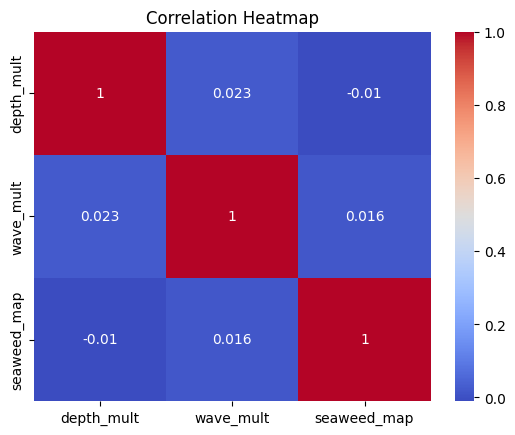

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import scipy.stats as stats

# Load your dataset
# Replace 'your_data.csv' with your dataset file name
dataset_file = 'ambient.csv'
data = pd.read_csv(dataset_file)

# Calculate Pearson's correlation coefficients
corr_matrix = data[['depth_mult', 'wave_mult', 'seaweed_map']].corr()

# Calculate r^2 values
r_squared_matrix = corr_matrix ** 2

# Calculate p-values
_, p_matrix_depth_seaweed = pearsonr(data['depth_mult'], data['seaweed_map'])
_, p_matrix_wave_seaweed = pearsonr(data['wave_mult'], data['seaweed_map'])

# Calculate confidence intervals
alpha = 0.05
z_critical = stats.norm.ppf(1 - alpha / 2)
ci_depth_seaweed = [np.tanh(np.arctanh(corr_matrix.loc['depth_mult', 'seaweed_map']) - z_critical / np.sqrt(len(data) - 3)),
                    np.tanh(np.arctanh(corr_matrix.loc['depth_mult', 'seaweed_map']) + z_critical / np.sqrt(len(data) - 3))]
ci_wave_seaweed = [np.tanh(np.arctanh(corr_matrix.loc['wave_mult', 'seaweed_map']) - z_critical / np.sqrt(len(data) - 3)),
                   np.tanh(np.arctanh(corr_matrix.loc['wave_mult', 'seaweed_map']) + z_critical / np.sqrt(len(data) - 3))]

print("Pearson's Correlation Matrix:")
print(corr_matrix)
print("\nCoefficient of Determination (r^2) Matrix:")
print(r_squared_matrix)
print("\nP-values:")
print(f"depth_mult vs. seaweed_growth: {p_matrix_depth_seaweed}")
print(f"wave_mult vs. seaweed_growth: {p_matrix_wave_seaweed}")
print("\nConfidence Intervals:")
print(f"depth_mult vs. seaweed_growth: {ci_depth_seaweed}")
print(f"wave_mult vs. seaweed_growth: {ci_wave_seaweed}")

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()



 RQ10 Does the cost of carbon sinks, the removal rate of carbon dioxide, and the distribution of seaweed  relate to each other?

Pearson's Correlation Matrix:
                               net_costperton_sink_low1p_avg  removal_rate  \
net_costperton_sink_low1p_avg                       1.000000     -0.446972   
removal_rate                                       -0.446972      1.000000   
seaweed_map                                        -0.593269      0.024680   

                               seaweed_map  
net_costperton_sink_low1p_avg    -0.593269  
removal_rate                      0.024680  
seaweed_map                       1.000000  

Coefficient of Determination (r^2) Matrix:
                               net_costperton_sink_low1p_avg  removal_rate  \
net_costperton_sink_low1p_avg                       1.000000      0.199784   
removal_rate                                        0.199784      1.000000   
seaweed_map                                         0.351968      0.000609   

                               seaweed_map  
net_costperton_sink_low1p_avg     0.351968  
removal_rate                  

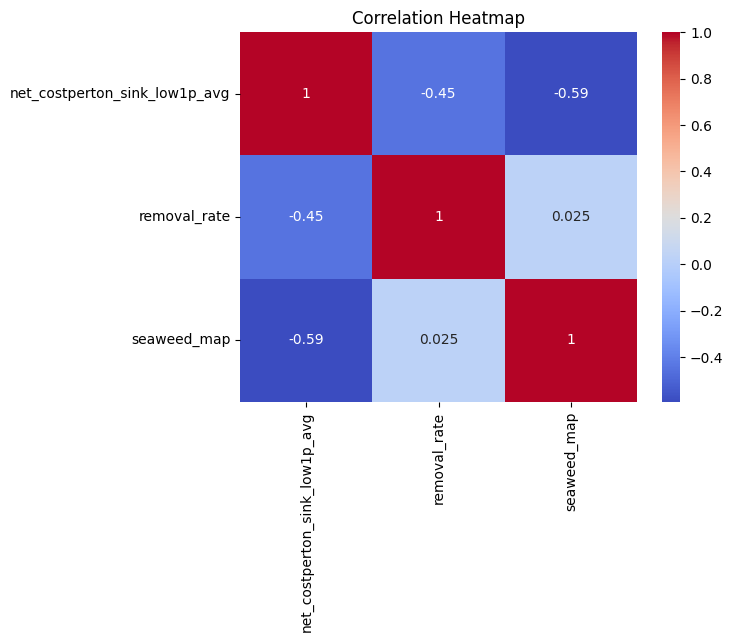

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, norm

# Load your dataset
# Replace 'your_data.csv' with your dataset file name
dataset_file = 'ambient.csv'
data = pd.read_csv(dataset_file)

# Calculate correlation matrix
corr_matrix = data[['net_costperton_sink_low1p_avg', 'removal_rate', 'seaweed_map']].corr()

# Calculate r^2 values
r_squared_matrix = corr_matrix ** 2

# Calculate p-values
_, p_matrix_cost_removal = pearsonr(data['net_costperton_sink_low1p_avg'], data['removal_rate'])
_, p_matrix_cost_seaweed = pearsonr(data['net_costperton_sink_low1p_avg'], data['seaweed_map'])
_, p_matrix_removal_seaweed = pearsonr(data['removal_rate'], data['seaweed_map'])

# Calculate confidence intervals
alpha = 0.05
z_critical = norm.ppf(1 - alpha / 2)

def calc_confidence_interval(r, n):
    return [np.tanh(np.arctanh(r) - z_critical / np.sqrt(n - 3)),
            np.tanh(np.arctanh(r) + z_critical / np.sqrt(n - 3))]

ci_cost_removal = calc_confidence_interval(corr_matrix.loc['net_costperton_sink_low1p_avg', 'removal_rate'], len(data))
ci_cost_seaweed = calc_confidence_interval(corr_matrix.loc['net_costperton_sink_low1p_avg', 'seaweed_map'], len(data))
ci_removal_seaweed = calc_confidence_interval(corr_matrix.loc['removal_rate', 'seaweed_map'], len(data))

print("Pearson's Correlation Matrix:")
print(corr_matrix)
print("\nCoefficient of Determination (r^2) Matrix:")
print(r_squared_matrix)
print("\nP-values:")
print(f"net_costperton_sink_low1p_avg vs. removal_rate: {p_matrix_cost_removal}")
print(f"net_costperton_sink_low1p_avg vs. seaweed_map: {p_matrix_cost_seaweed}")
print(f"removal_rate vs. seaweed_map: {p_matrix_removal_seaweed}")
print("\nConfidence Intervals:")
print(f"net_costperton_sink_low1p_avg vs. removal_rate: {ci_cost_removal}")
print(f"net_costperton_sink_low1p_avg vs. seaweed_map: {ci_cost_seaweed}")
print(f"removal_rate vs. seaweed_map: {ci_removal_seaweed}")

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)
model.fit(X_train, Y_train, callbacks=[reduce_lr])